**Nội dung bài thực hành**

Người học tiếp cận và giải quyết bài toán phân lớp văn bản sử dụng phương pháp Naive Bayser. Sau khi thực hành, người học có khả năng:
1. Sử dụng được các công cụ của sklearn cho bài toán phân lớp
  

*   Thao tác với dữ liệu
*   Chuyển từ văn bản sang không gian vector


2. Áp dụng được NB cho bài toán phân lớp


*   Huấn luyện mô hình
*   Đánh gía mô hình


3. Cải tiến được mô hình phân lớp
3. Thực hành được với bài toán thực tế

**Thao tác với dữ liệu**



*   Bài thực hành sử dụng dữ liệu tiếng Anh
*   Dữ liệu gồm 18.000 bài báo được tổ chức trong 20 lớp (classes/groups)
*   Yêu cầu: xây dựng mô hình phân lớp các bài báo dựa trên mô hình học máy Naive Bayes



**Đọc dữ liệu**

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

**Quan sát dữ liệu huấn luyện**



*   Số lượng dữ liệu huấn luyện
*   5 văn bản đầu tiên



In [2]:
print("The number of training examples", len(twenty_train.data))

# printing top five training examples
twenty_train.data[0:5]

The number of training examples 11314


["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 



*   Danh sách tên các lớp



In [3]:
# You can check the target names (categories) and some data files by following commands.
twenty_train.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']



*   Nhãn của các lớp



In [4]:
targets = twenty_train.target
print(targets)

print(len(targets))

[7 4 4 ... 3 1 8]
11314




*  Hiển thị dòng đầu tiên của văn bản đầu tiên



In [5]:
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


**Chuẩn bị dữ liệu huấn luyện**

Phần chuẩn bị dữ liệu cho huấn luyện mô hình là việc chuyển các văn bản vào không gian đặc trưng (vector space model)

*   Đặc trưng: sử dụng term frequency (TF) hoặc TF-IDF
*   Đếm số lần xuất hiện của các từ
*   Dựa trên bag-of-words model





*   Tạo ma trận term-document, trong đó giá trị ở mỗi ô là số lần xuất hiện của từ trong văn bản chứa nó



In [6]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [7]:
print(X_train_counts.shape)

print(X_train_counts[0])

(11314, 130107)
  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1




*   Biểu diễn văn bản bằng TF-IDF



In [8]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [9]:
print(X_train_tfidf.shape)

print(X_train_tfidf[0])

#TF-IDF càng cao thì từ đó có sự quan trọng đặc biệt trong văn bản đó thay vì văn bản khác, đồng thời giảm sự quan trọng của các từ thông thường

(11314, 130107)
  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.0546142865885

**Huấn luyện mô hình**



*   Khởi tạo đối tượng
*   Huấn luyện mô hình
*   Giải các tham số của NB



In [10]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

**Lưu ý khi thiết lập thực nghiệm**

Ở đây, chúng ta sử dụng cách chia dữ liệu làm 2 phần, training-test.
Chúng ta cũng có thể sử dụng cách k-fold cross-valiation

**Trực quan hóa quá trình huấn luyện của NB**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  
  """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
  
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

  plt.legend(loc="best")
  return plt

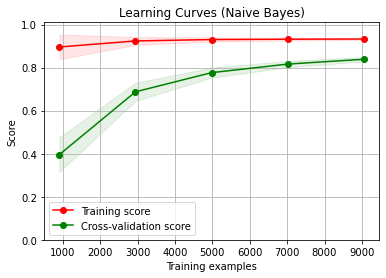

In [12]:
estimator = MultinomialNB()
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X, y = X_train_tfidf, twenty_train.target
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=8)
plt.show()

**Đánh giá mô hình trên dữ liệu test**

In [13]:
import numpy as np

twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data) # dự đoán các bài báo trong tập test thuộc các lớp nào
np.mean(predicted == twenty_test.target) #trả về xác suất dự đoán trung bình cho tất cả tập test

0.7738980350504514

**Confusion matrix**

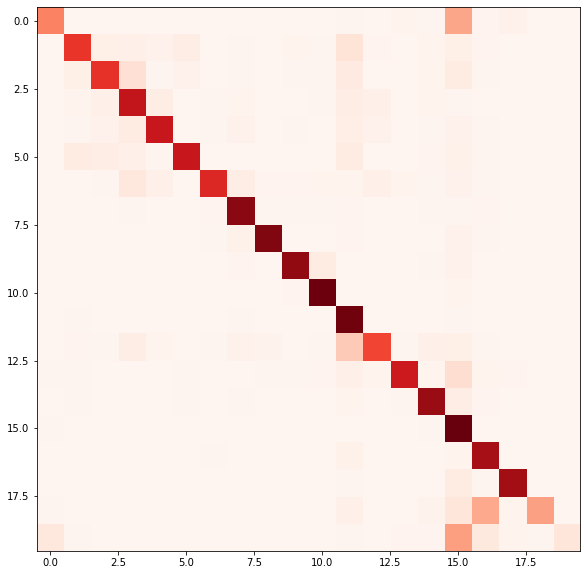

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

In [14]:
from sklearn.metrics import confusion_matrix
# sử dụng confusion matrix để đánh giá chất lượng đầu ra của bộ phân loại trên tập dữ liệu test
cm = confusion_matrix(twenty_test.target, predicted)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Reds")
plt.show()
print(cm)

**Cải tiến mô hình**

Hiệu quả của mô hình có thể cải tiến bằng nhiều phương pháp, trong đó một trong những phương pháp đơn giản là cải tiến quá trình chuyển từ văn bản sang không gian vector. Trong phần này, mô hình sẽ được cải tiếng bằng cách sử dụng:



*   Loại bỏ các từ dừng
*   Đưa một từ về từ gốc





*   Khởi tạo mô hình có dùng thêm tham số loại bỏ đi các từ dừng



In [15]:
# NLTK
# Removing stop words in English
#Loại bỏ stop words: Những từ xuất hiện thường xuyên trong bất kỳ văn bản nào như 'and', 'the', 'of', ... được loại bỏ.
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])



*   Sử dụng stemming(gốc từ), và huấn luyện lại mô hình
*   When downloading NLTK, you mal use *all* to download all packages



In [16]:
# Stemming Code

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Long\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
print('steming the corpus... Please wait...')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        #áp dụng stemming (stemmer.stem(w)) lên từng từ trong văn bản
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(twenty_train.data, twenty_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(twenty_test.data)

np.mean(predicted_mnb_stemmed == twenty_test.target)

steming the corpus... Please wait...


0.8167817312798725

**So sánh với phương pháp phân loại SVM**

In [18]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter_no_change=5, 
                                                   random_state=42))])

text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.8240839086563994

**Trực quan hoá quá trình huấn luyện của NB và SVM**

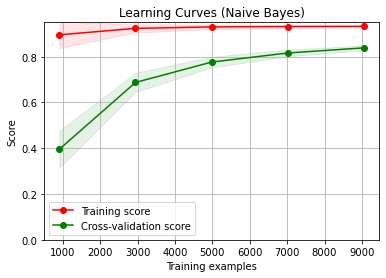

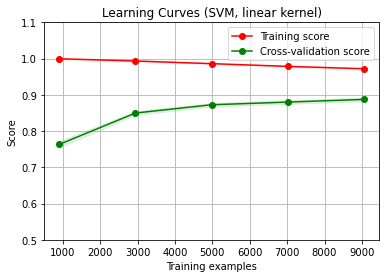

In [19]:
estimator = MultinomialNB()
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X, y = X_train_tfidf, twenty_train.target
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 0.95), cv=cv, n_jobs=8)

#from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title = "Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#estimator = SVC(gamma=0.001)

estimator = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter_no_change=5, random_state=42, verbose=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.1), cv=cv, n_jobs=8)

plt.show()

**Sử dụng GridSearch để tìm tham số phù hợp**

Có thể sử dụng thuật toán GridSearch để tìm tham số phù hợp--> tăng độ tốt của mô hình.
Tuy nhiên, thuật toán này có nhược điểm là tốc độ chậm nên có thể phù hợp với bộ dữ liệu nhỏ.
Với bộ dữ liệu lớn thuật toán chạy trong thời gian lâu

In [26]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
#cv ko đƯợc chỉ định nên mặc định là 5-fold cross-validation
parameters = {'vect__ngram_range': [(1, 1),(1, 2),(1, 3)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

'''
ngram_range được đặt là [(1, 1), (1, 2)], 
có nghĩa là CountVectorizer sẽ tạo ra các đặc trưng từ một từ đơn (unigram) và các cặp từ liền kề (bigram).
(1, 1) đại diện cho unigram, nghĩa là mỗi từ trong văn bản ban đầu sẽ được coi là một đặc trưng riêng biệt.
(1, 2) đại diện cho bigram, nghĩa là mỗi cặp từ liền kề trong văn bản sẽ được coi là một đặc trưng riêng biệt.
'''

'\nngram_range được đặt là [(1, 1), (1, 2)], \ncó nghĩa là CountVectorizer sẽ tạo ra các đặc trưng từ một từ đơn (unigram) và các cặp từ liền kề (bigram).\n(1, 1) đại diện cho unigram, nghĩa là mỗi từ trong văn bản ban đầu sẽ được coi là một đặc trưng riêng biệt.\n(1, 2) đại diện cho bigram, nghĩa là mỗi cặp từ liền kề trong văn bản sẽ được coi là một đặc trưng riêng biệt.\n'

In [27]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.
# text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
#                      ('clf', MultinomialNB())])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [28]:
# To see the best mean score and the params, run the following code

print(gs_clf.best_score_)
print(gs_clf.best_params_)

'''
0.9129399133330441 use stop word
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

0.909757905302422 use steammed
{'clf__alpha': 0.01, 'tfidf__use_idf': False}

'''

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier (not so naive anymore! 😄)
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

0.9129399133330441
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


"\n0.9129399133330441 use stop word\n{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}\n\n0.909757905302422 use steammed\n{'clf__alpha': 0.01, 'tfidf__use_idf': False}\n\n"

In [30]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(twenty_train.data, twenty_train.target)


gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}